In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

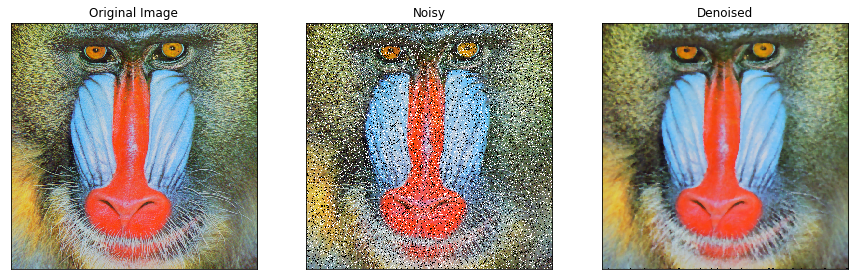

In [2]:
#Salt and pepper noise and it's denoising with median blur


path = 'misc/'
imgpath1 = path + '4.2.03.tiff'
img = cv2.imread(imgpath1, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows, columns, channels = img.shape
p = 0.2

noisy = np.zeros(img.shape, np.float32)

#Setting some pixel values to 0 or 255 with a small probability
for i in range(rows):
    for j in range(columns):
        r = random.random()
        if r < p/2:
            #pepper sprinkled
            noisy[i][j] = [0, 0, 0]
        elif r < p:
            #salt sprinkled
            noisy[i][j] = [255, 255, 255]
        else:
            noisy[i][j] = img[i][j]
noisy /= 255
denoised = cv2.medianBlur(noisy, 5)
titles = ['Original Image', 'Noisy', 'Denoised']
outputs = [img, noisy, denoised]
plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(outputs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

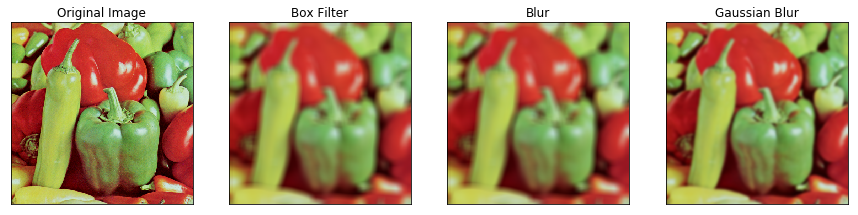

In [3]:
#LOW PASS FILTERS -> blurring, smoothing, denoising
#Kernels



path = 'misc/'
imgpath1 = path + '4.2.07.tiff'
img = cv2.imread(imgpath1, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

box = cv2.boxFilter(img, -1, (21, 21))
blur  = cv2.blur(img, (21, 21))
gaussian = cv2.GaussianBlur(img, (21, 21), 0)


titles = ['Original Image', 'Box Filter', 'Blur', 'Gaussian Blur']
outputs = [img, box, blur, gaussian]
plt.figure(figsize=(15, 15))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(outputs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

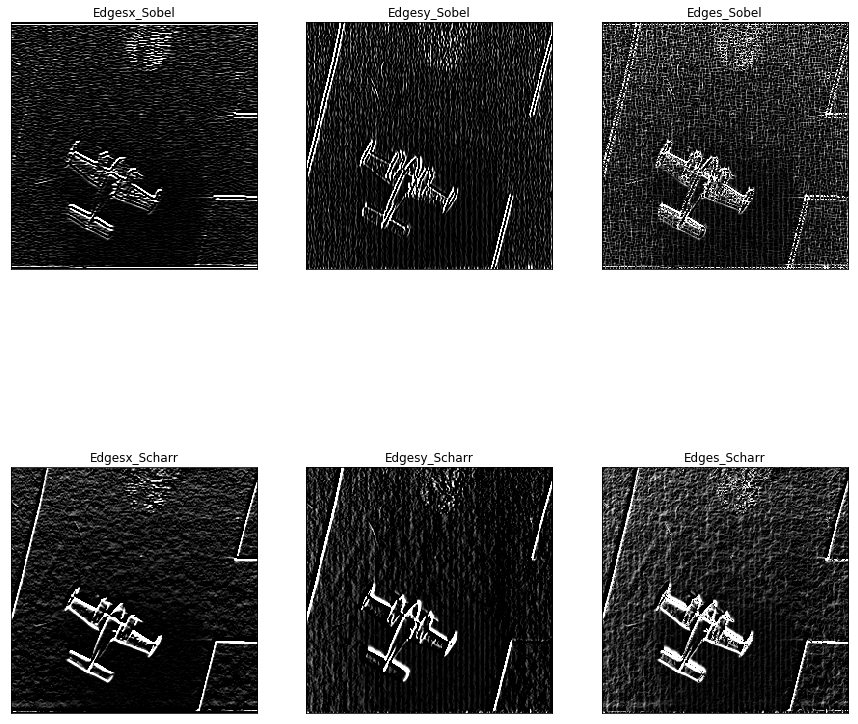

In [4]:
#High pass filters: detect edges



path = 'misc/'
imgpath1 = path + '5.1.11.tiff'
img1 = cv2.imread(imgpath1, 1)
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

edgesx_Sobel = cv2.Sobel(img, -1, dx=0, dy=3,ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
edgesy_Sobel = cv2.Sobel(img, -1, dx=3, dy=0,ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
edges_Sobel = edgesx_Sobel + edgesy_Sobel

edgesx_Scharr = cv2.Scharr(img, -1, dx=0, dy=1, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
edgesy_Scharr = cv2.Scharr(img, -1, dx=1, dy=0, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
edges_Scharr = edgesx_Scharr + edgesy_Scharr


titles = ['Edgesx_Sobel', 'Edgesy_Sobel', 'Edges_Sobel', 
          'Edgesx_Scharr', 'Edgesy_Scharr', 'Edges_Scharr']

outputs = [edgesx_Sobel,  edgesy_Sobel,  edges_Sobel, 
           edgesx_Scharr, edgesy_Scharr, edges_Scharr]


plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(outputs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

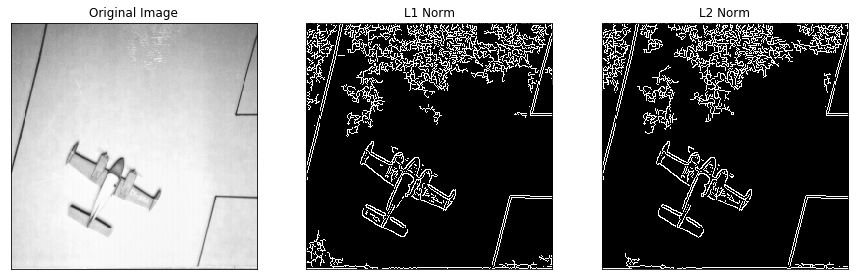

In [5]:
#Canny edge detector


path = "misc/"
imgpath =  path + "5.1.11.tiff"
img = cv2.imread(imgpath, 0)

L1 = cv2.Canny(img, 10, 50, L2gradient=False)

L2 = cv2.Canny(img, 10, 50, L2gradient=True)


titles = ['Original Image', 'L1 Norm', 'L2 Norm']

outputs = [img, L1, L2]

plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(outputs[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()